만약 데이터 사이언스, 머신러닝 또는 캐글에서 어떤 것을 해야하는지 잘 모르는 newbie라면, 타이타닉을 하시는 게 가장 좋은 선택입니다.
타이타닉은 아시다시피, 사상 최대 해난사고로써, 1,500여명의 희생자가 발생했습니다.
우리는 이 튜토리얼에서 타이타닉에 탑승한 사람들의 신상정보를 활용하여, 승선한 사람들의 생존여부를 예측하는 모델을 생성할 것입니다.
본 튜토리얼에서는 여러 시각화 도구(matplotlib, seabon, plotly), 데이터 분석 도구(pandas,nnumpy), 머신러닝 도구(sklearn)을 사용할 것 입니다.
본 튜토리얼은 캐글에 있는 여러 커널들을 참조하여 만들었습니다.
본 튜토리얼을 공부하신 뒤에, 캐글 타이타닉 컴퍼티션에 존재하는 여러 다른 커널들을 더 공부하시면 됩니다.
본 튜토이얼은 파이썬 문법에 어려움이 없으셔야 수월할 것입니다.
여기서 사용하는 라이브러리들을 써본 경험이 있으면 좋겠지만, 경험이 없다하더라도 한 줄씩 천천히 적어나가시면 충분히 하실 수 있습니다.

Content
1. Dataset check
    1.1 Null data check
    1.2 Target label check
2. Exploratory data analysis
    2.1 Pclass
    2.2 Sex
    2.3 Both Sex and Pclass
    2.4 Age
    2.5 Pclass, Sex, Age
    2.6 Embarked
    2.7 Family - SibSp(Brother & Sister) + Parch (Parents & Children)
    2.8 Cabin

앞으로 진행할 프로세스는 다음과 같다
1. 데이터셋 확인
    - 대부분의 캐글 데이터들은 잘 정제되어 있음.
    하지만 가끔, null data가 존재함.
    이를 확인하고, 향후 수정
2. 탐색적 데이터 분석 (exploratory data analysis)
    - 여러 feature들을 개별적으로 분석하고, feature들 간의 상관관계를 확인
    여러 시각화 툴을 사용하여 insight를 얻음
3. feature engineering
    - 모델을 세우기에 앞서, 모델의 성능을 높일 수 있도록 feature들을 engineering 함
    one-hot, encoding, class로 나누기, 구간으로 나누기, 텍스트 데이터 처리 등을 함
4. model 만들기
    - sklearn을 사용해 모델을 만듬
    파이썬 머신러닝을 할 때는 sklearn을 사용하면 수 많은 알고리즘을 일관된 문법으로 사용 가능
    물론 딥러닝을 위해 tensorflow, pytorch 등을 사용 할 수 있음
5. 모델 학습 및 예측
    - trainset을 가지고 모델을 학습 시킨 후, testset을 가지고 prediction 실시
6. 모델 평가
    - 예측 성능이 원하는 수준인지 판단.
    풀려는 문제에 따라 모델을 평가하는 방식도 달라짐
    학습된 모델이 어떤 것을 학습하였는지 확인

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-v0_8')
sns.set(font_scale=2.5)
'''
위 두줄은 필자가 항상 쓰는 방법.
matplotlib의 기본 scheme 말고 seaborn scheme을 세팅하고, 일일이 graph의 font size를 지정할 필요 없이
seaborn의 font_size를 사용하면 편리함
'''

import missingno as msno

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

1. Dataset 확인
    1.1 파이썬에서 테이블화 된 데이터를 다루는 데 가장 최적화 되어있으며, 많이 쓰는 라이브러리는 pandas이다
    1.2 pandas를 사용하여 데이터셋의 간단한 통계적 분석부터, 복잡한 처리들을 간단한 메소드를 사용하여 할 수 있음.
    1.3 캐글에서 데이터셋은 보통 train, testset으로 나뉘어져 있음.

In [2]:
print('-----------------------Dataset check-----------------------')

df_train = pd.read_csv('./train.csv')
df_test = pd.read_csv('./test.csv')

df_train.head()

-----------------------Dataset check-----------------------


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


우리가 다루는 문제에서 feature는 Pclass, Age, SibSp, Parch, Fare 이며, 예측하려는 target label은 Survived 이다.
pandas dataframe에는 describe() 메소드가 있는데, 이를 쓰면 각 feature가 가진 통계치들을 반환해 줌

In [3]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


테이블에서 보다시피, PassenserID 숫자와 다른, 그러니깐, null data가 존재하는 열(feature)가 있음
이를 좀 더 보기 편하게 그래프로 시각화하여 확인하기

In [8]:
print('-----------------------1.1 Null data check-----------------------')

for col in df_train.columns :
    msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100 * (df_train[col].isnull().sum() / df_train[col].shape[0]))
    print(msg)
    
for col in df_test.columns :
    msg = 'column: {:>10}\t Percent of NaN value : {: .2f}%'.format(col, 100*(df_test[col].isnull().sum() / df_test[col].shape[0]))
    print(msg)

-----------------------1.1 Null data check-----------------------
column: PassengerId	 Percent of NaN value: 0.00%
column:   Survived	 Percent of NaN value: 0.00%
column:     Pclass	 Percent of NaN value: 0.00%
column:       Name	 Percent of NaN value: 0.00%
column:        Sex	 Percent of NaN value: 0.00%
column:        Age	 Percent of NaN value: 19.87%
column:      SibSp	 Percent of NaN value: 0.00%
column:      Parch	 Percent of NaN value: 0.00%
column:     Ticket	 Percent of NaN value: 0.00%
column:       Fare	 Percent of NaN value: 0.00%
column:      Cabin	 Percent of NaN value: 77.10%
column:   Embarked	 Percent of NaN value: 0.22%
column: PassengerId	 Percent of NaN value :  0.00%
column:     Pclass	 Percent of NaN value :  0.00%
column:       Name	 Percent of NaN value :  0.00%
column:        Sex	 Percent of NaN value :  0.00%
column:        Age	 Percent of NaN value :  20.57%
column:      SibSp	 Percent of NaN value :  0.00%
column:      Parch	 Percent of NaN value :  0.00%
col

Train, Test set에서 Age(둘다 약 20%), Cabin(둘다 약 80%), Embarked(Train만 0.22%) null data가 존재하는 것을 볼 수 있음.
Mano 라는 라이브러리를 사용하면 null data의 존재를 더 쉽게 볼 수 있음.

ValueError: keyword grid_b is not recognized; valid keywords are ['size', 'width', 'color', 'tickdir', 'pad', 'labelsize', 'labelcolor', 'zorder', 'gridOn', 'tick1On', 'tick2On', 'label1On', 'label2On', 'length', 'direction', 'left', 'bottom', 'right', 'top', 'labelleft', 'labelbottom', 'labelright', 'labeltop', 'labelrotation', 'grid_agg_filter', 'grid_alpha', 'grid_animated', 'grid_antialiased', 'grid_clip_box', 'grid_clip_on', 'grid_clip_path', 'grid_color', 'grid_dash_capstyle', 'grid_dash_joinstyle', 'grid_dashes', 'grid_data', 'grid_drawstyle', 'grid_figure', 'grid_fillstyle', 'grid_gapcolor', 'grid_gid', 'grid_in_layout', 'grid_label', 'grid_linestyle', 'grid_linewidth', 'grid_marker', 'grid_markeredgecolor', 'grid_markeredgewidth', 'grid_markerfacecolor', 'grid_markerfacecoloralt', 'grid_markersize', 'grid_markevery', 'grid_mouseover', 'grid_path_effects', 'grid_picker', 'grid_pickradius', 'grid_rasterized', 'grid_sketch_params', 'grid_snap', 'grid_solid_capstyle', 'grid_solid_joinstyle', 'grid_transform', 'grid_url', 'grid_visible', 'grid_xdata', 'grid_ydata', 'grid_zorder', 'grid_aa', 'grid_c', 'grid_ds', 'grid_ls', 'grid_lw', 'grid_mec', 'grid_mew', 'grid_mfc', 'grid_mfcalt', 'grid_ms']

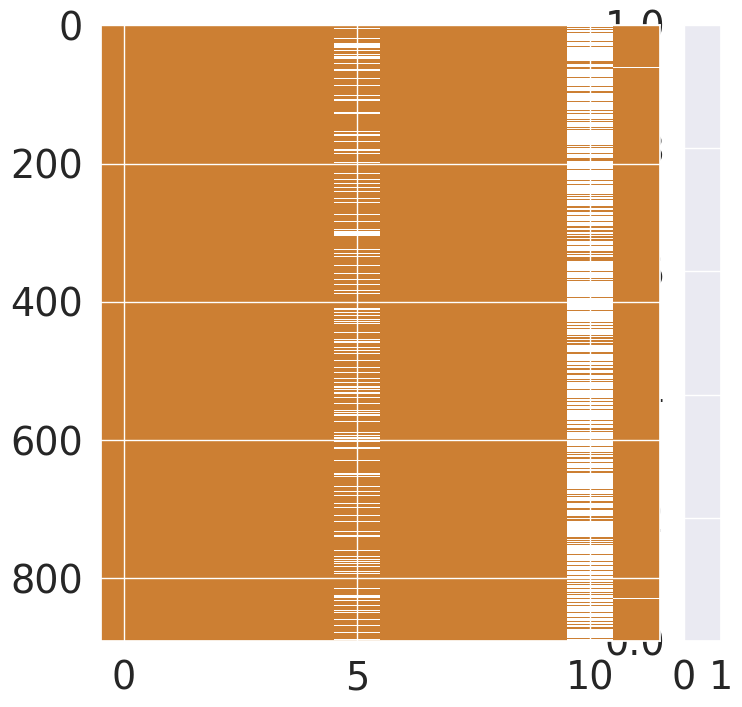

In [9]:
msno.matrix(df=df_train.iloc[:, :], figsize=(8,8), color = (0.8, 0.5, 0.2))

<Axes: >

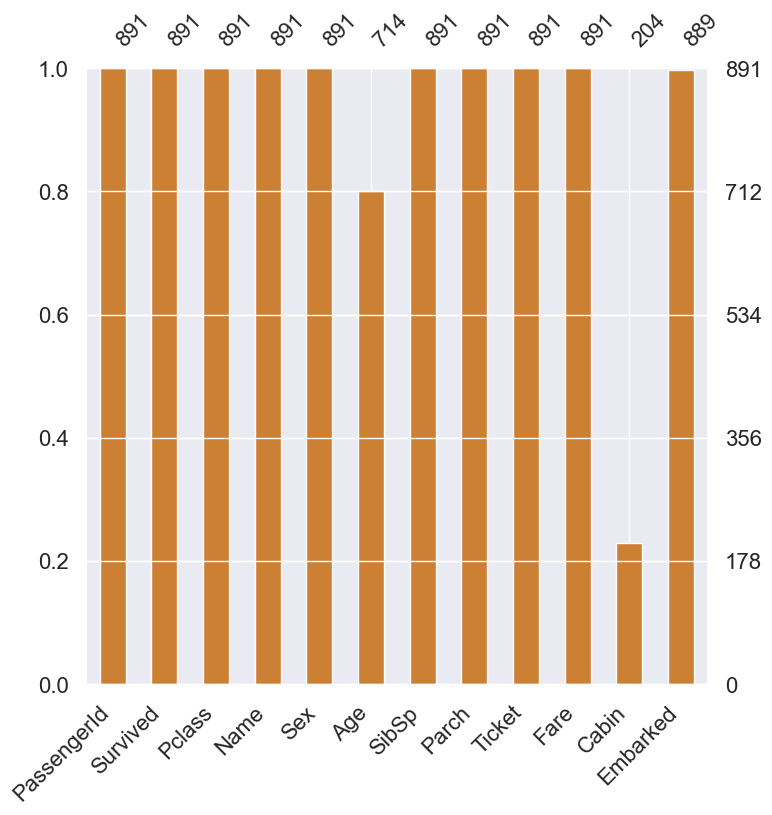

In [ ]:
msno.bar(df=df_train.iloc[:, :], figsize=(8,8), color=(0.8, 0.5, 0.2))

<Axes: >

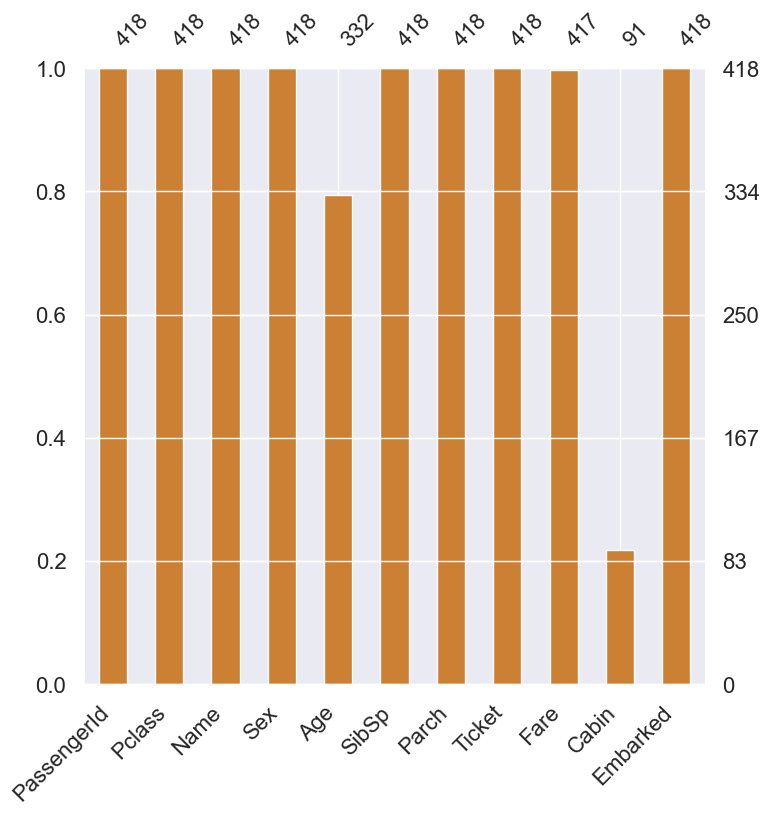

In [ ]:
msno.bar(df=df_test.iloc[:, :], figsize=(8,8), color=(0.8, 0.5, 0.2))

target_lable이 어떤 distribution을 가지고 있는지 확인해야함
지금 같은 binary classification 문제의 경우에서, 1과 0의 분포가 어떠냐에 따라 모델의 평가 방법이 달라질 수 있음.

-----------------------1.2 Target label check-----------------------


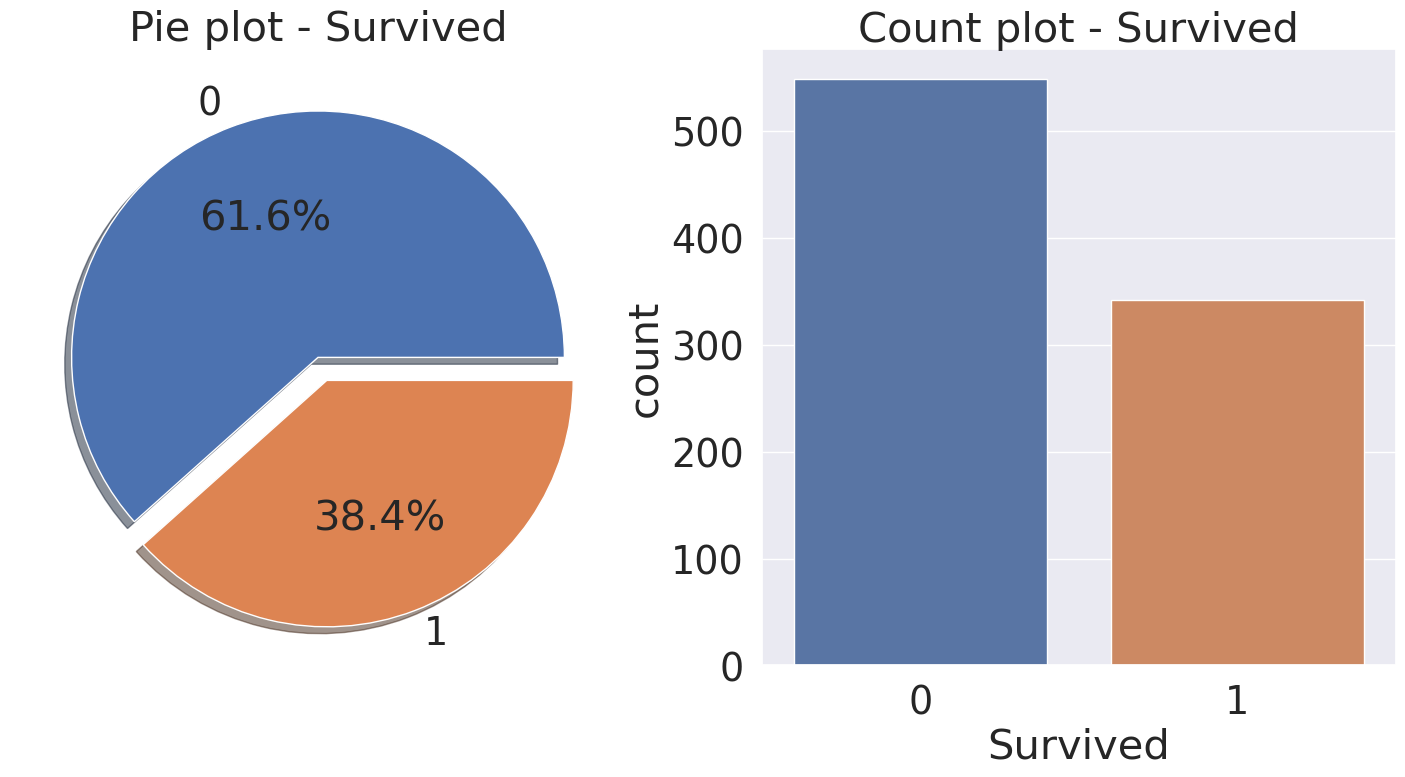

In [10]:
print('-----------------------1.2 Target label check-----------------------')

f, ax = plt.subplots(1, 2, figsize = (18,8))

df_train['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct = '%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('')

sns.countplot(x='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Count plot - Survived')

plt.show()

위 countplot이 작동하지않음.
해당 커널을 옮겨서 작동시켜도 동일함.
사유는 다음 필사 때 찾아보기


--- sns.countplot('Survived', data=df_train, ax=ax[1])
해당 구문을
sns.countplt(x='Survived', data=df_train, ax=ax[1])
으로 바꾸면 정상 작동함
밑에 seaborn 함수 전부 x, y를 명시해줄 것

In [ ]:
print('-----------------------1.2 Target label check-----------------------')

f, ax = plt.subplots(1, 2, figsize = (18,8))

df_train['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct = '%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('')

sns.countplot(x='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Count plot - Survived')

plt.show()

안타깝게도 죽은 사람이 많음.
38.4%가 살아남음
target_label의 분포가 제법 균일(balanced)함.
불균일한 경우, 예를 들어 100중 1: 99개, 0:1개인 경우에 모든것이 1이라고 해도 정확도는 99%가 나옴.
0을 찾는 문제라면 이 모델은 원하는 결과를 줄 수 없음.

2. Exploratory data analysis

    - 이제 본격적으로 데이터 분석을 해보겠습니다.
    데이터는 매우 많습니다.
    이 많은 데이터 안에 숨겨진 사실을 찾기 위해선 적절한 시각화가 필요함
    
    -시각화 라이브러리는 matplotlib, seaborn, plotly등이 있음.
    특정 목적에 맞는 소스코드를 정리해두어 필요할 때마다 참고하면 편리함.

2-1 Pclass
    - 먼저 Pclass 에 대해 살펴보기로 함.
    Pclass는 ordinal, 서수형 데이터입니다.
    카테고리이면서, 순서가 있는 데이터 타입입니다.
    
    -Pclass에 따른 생존률의 차이를 살펴보기로 함
    엑셀의 피벗 차트와 유사한 작업을 하게 되는데, pandas dataframe에서는 groupby 를 사용하면 쉽게 구현 가능
    또한 pivot 이라는 메소스도 있음.
    
    -'Pclass', 'Survived'를 가져온 후, pclass로 묶음.
    그러고나면 각 pclass 마다 0, 1이 count되며, 이를 평균내면 각 pclass 별 생존률이 나옴
    
    -아래와 같은 count()를 하면, 각 class에 몇명이 있는지 확인할 수 있으며, sum()을 하면, 216명 중 생존한(Survived=1) 사람의 총합을 주게 됨

In [ ]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).count()

,Survived
Pclass,
1,216
2,184
3,491


In [ ]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).sum()

,Survived
Pclass,
1,136
2,87
3,119


pandas의 crossta을 사용하면 좀 더 위 과정을 좀더 수월하게 볼 수 있음.

In [ ]:
pd.crosstab(df_train['Pclass'], df_train['Survived'], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


grouped 객체에 mean()을 하게되면, 각 클래스별 생존률을 얻을 수 있음.
class 1이면 아래과 같음

80 / (80 + 136) == 0.63

<Axes: xlabel='Pclass'>

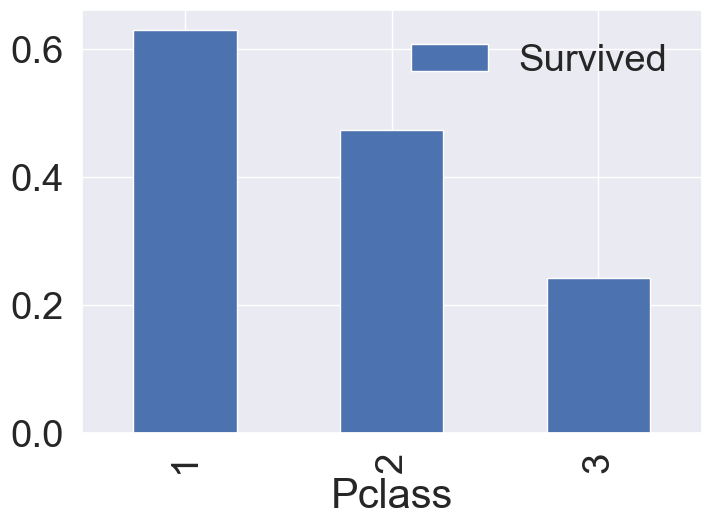

In [ ]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar()

보다시피, Pclass가 좋을수록(1st) 생존률이 좊은 것을 확인할 수 있음
보기 쉽게 그래프로 그려보겠습니다.
seaborn의 countplot을 이용하면, 특정 label에 따른 개수를 확인해볼 수 있음.

TypeError: countplot() got multiple values for argument 'data'

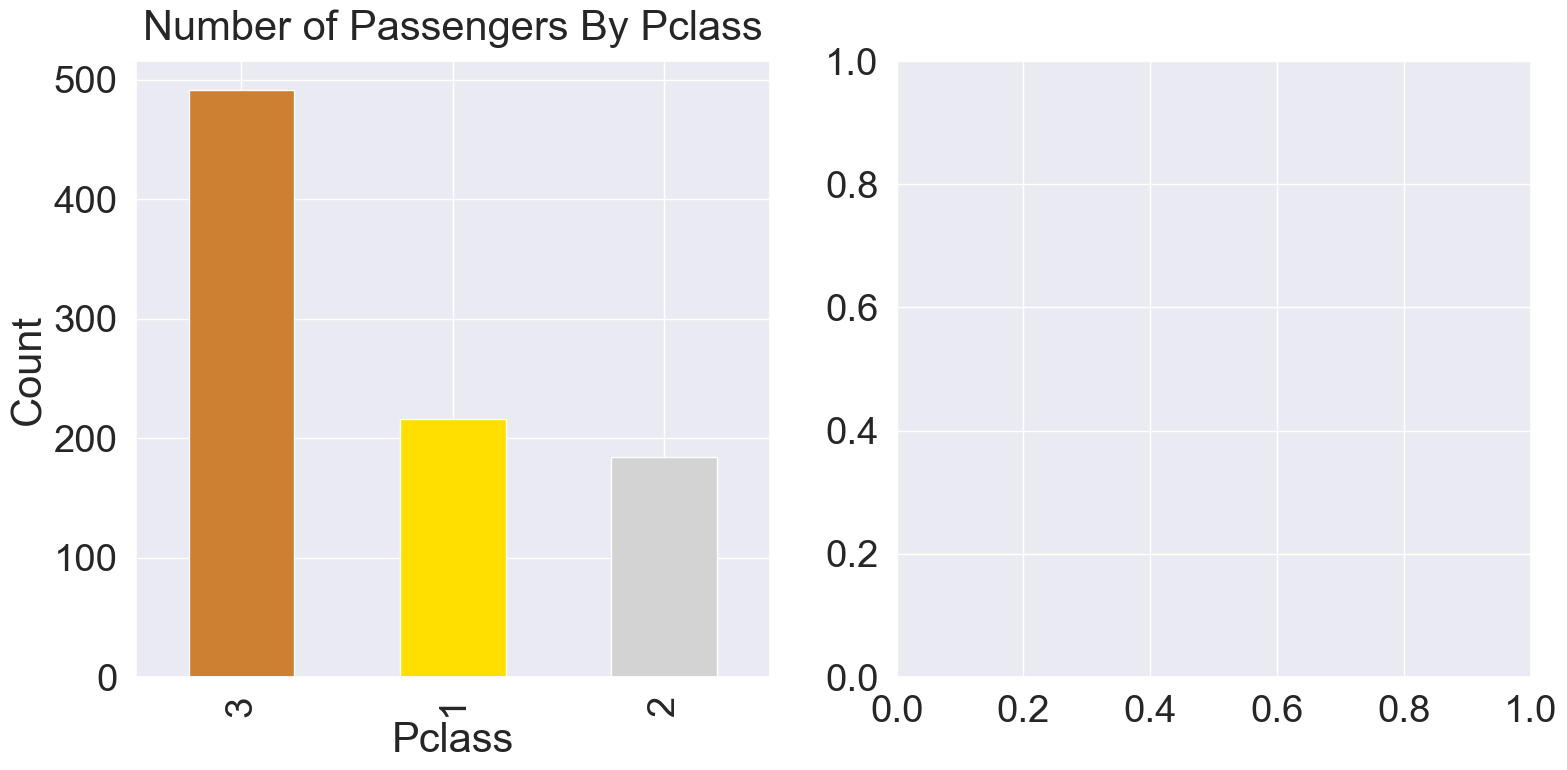

In [ ]:
y_position = 1.02
f, ax = plt.subplots(1, 2, figsize = (18, 8))
df_train['Pclass'].value_counts().plot.bar(color = ['#CD7F32','#FFDF00','#D3D3D3'], ax=ax[0])
ax[0].set_title('Number of Passengers By Pclass', y= y_position)
ax[0].set_ylabel('Count')
sns.countplot('Pclass', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Pclass: Survived vs Dead', y=y_position)

plt.show()

클래스가 높을 수록, 생존 확률이 높은걸 확인할 수 있음.
Pclass 1, 2, 3 순서대로 63#, 48%, 25%
생존에 Pclass가 큰 영향을 미친다고 생각됨.
나중에 모델을 세울 때 이 feature를 사용하면 좋을 것이라 판단 가능

2.2 Sex
    -이번에는 성별로 생존률이 어떻게 달라지는 지 확인
    -마찬가지로 pandas groupby와 seaborn countplot을 사용해서 시각화

TypeError: countplot() got multiple values for argument 'data'

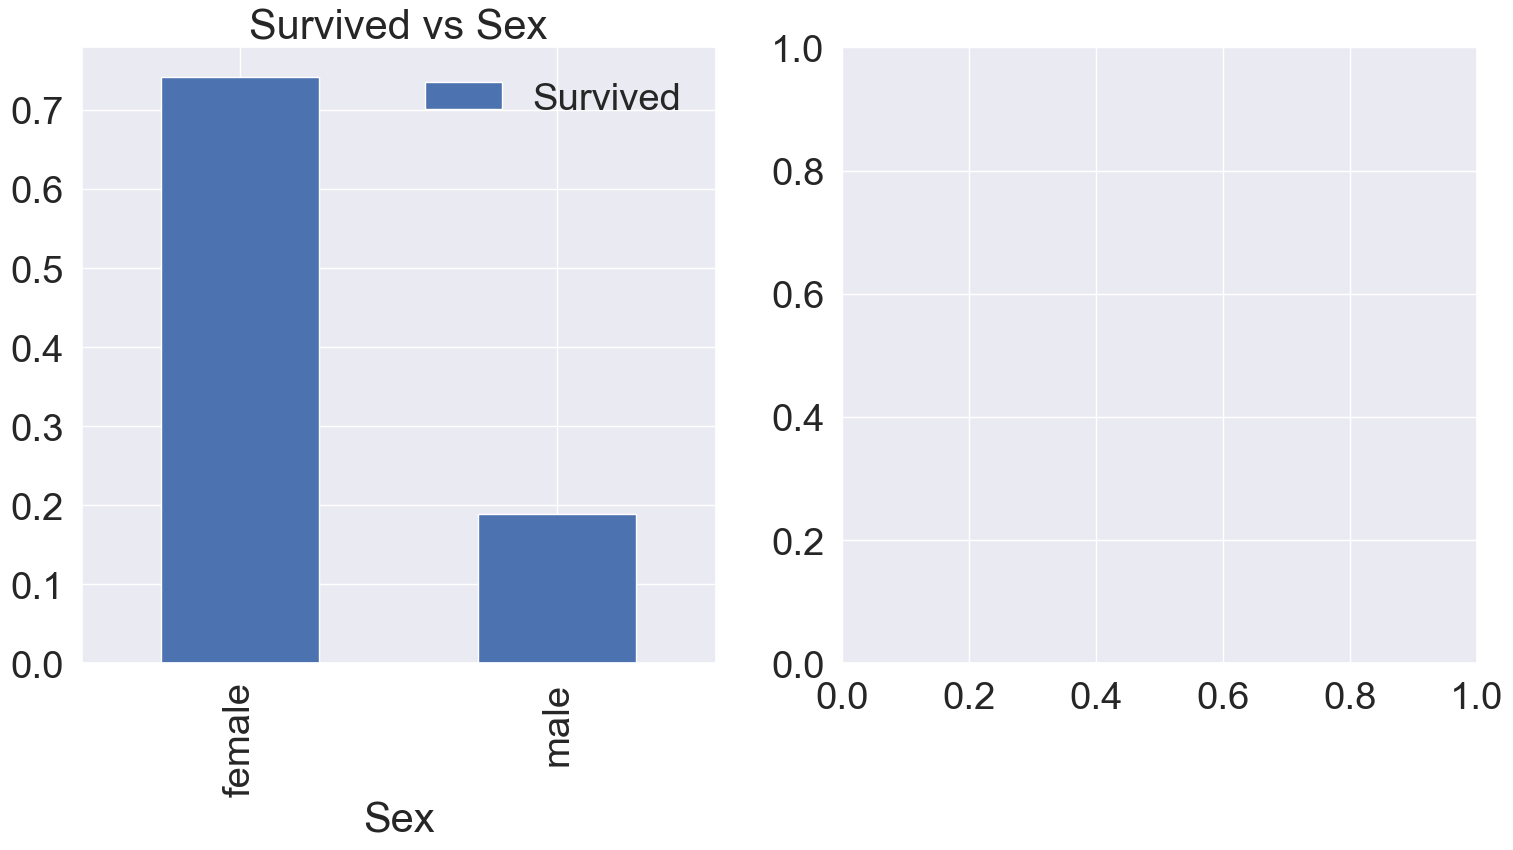

In [ ]:
f, ax = plt.subplots(1, 2, figsize = (18, 8))
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=True).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Sex: Survived vs Dead')
plt.show()

In [ ]:
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [ ]:
pd.crosstab(df_train['Sex'], df_train['Survived'], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


Pclass 와 마찬가지로, sex도 예측 모델에 쓰일 중요한 feature 임을 알 수 있다.

2.3 Both sex and Pclass
    - 이번에는 Sex, Pclass 두가지에 관하여 생존이 어떻게 달라지는지 확인해봅시다.
    - seaborn의 factorplot을 이용하면, 손쉽게 3개의 차원으로 이루어진 그래프를 그릴 수 있습니다.

In [ ]:
sns.catplot('Pcalss', 'Survived', hue='Sex', data=df_train, size=6, aspect=1.5)

'''
커널에서는 factorplot을 사용하라고 하지만, 해당 함수는 오래되어 바뀌었다고 함
catplot 으로 바뀌었나봄. 또한, data에 대한 이슈는 여기서도 발생되어 댓글로 확인하면 좋을 듯
'''

TypeError: catplot() got multiple values for argument 'data'

    - 모든 클래스에서 female이 살 확률이 male보다 높은걸 알 수 있음.
    - 또한 남자, 여자 상관없이 클래스가 높을수록 살 확률이 높음
    - 위 그래프는 hue 대신 column으로 하면 아래와 같아짐

AttributeError: PathCollection.set() got an unexpected keyword argument 'satureation'

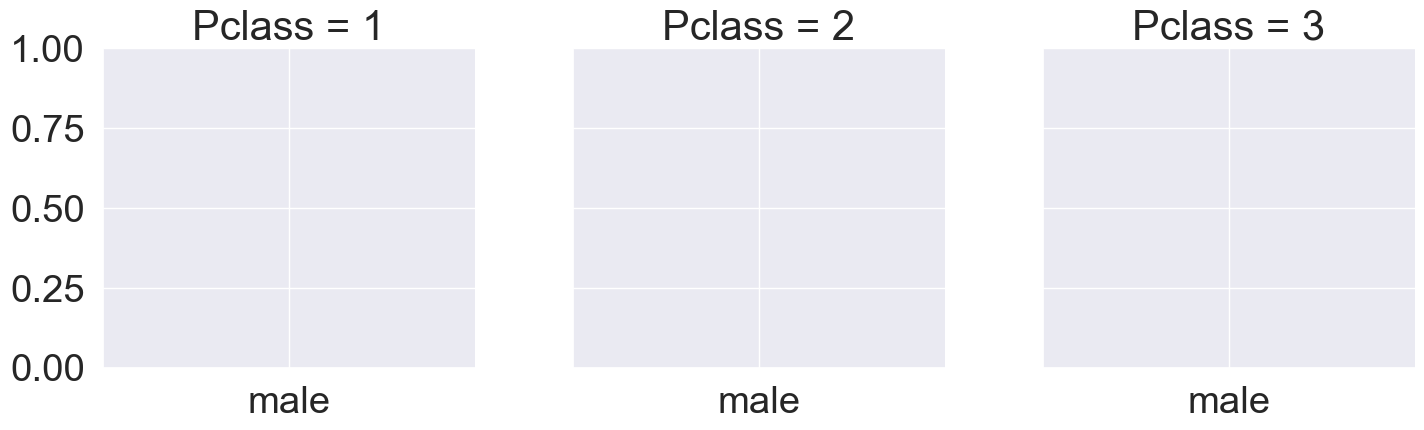

In [ ]:
sns.catplot(x='Sex', y='Survived', col='Pclass',
              data=df_train, satureation=.5,
               size=9, aspect=1
              )

2-4 .Age
    - Age feature 확인하기

In [ ]:
print("제일 나이 많은 탑승객 : {:.1f} Years".format(df_train['Age'].max()))
print("제일 나이 적은 탑승객 : {:.1f} Years".format(df_train['Age'].min()))
print("탑승객 평균 나이 : {:.1f} Years".format(df_train['Age'].mean()))

제일 나이 많은 탑승객 : 80.0 Years
제일 나이 적은 탑승객 : 0.4 Years
탑승객 평균 나이 : 29.7 Years


생존에 따른 Age의 histogram 그리기

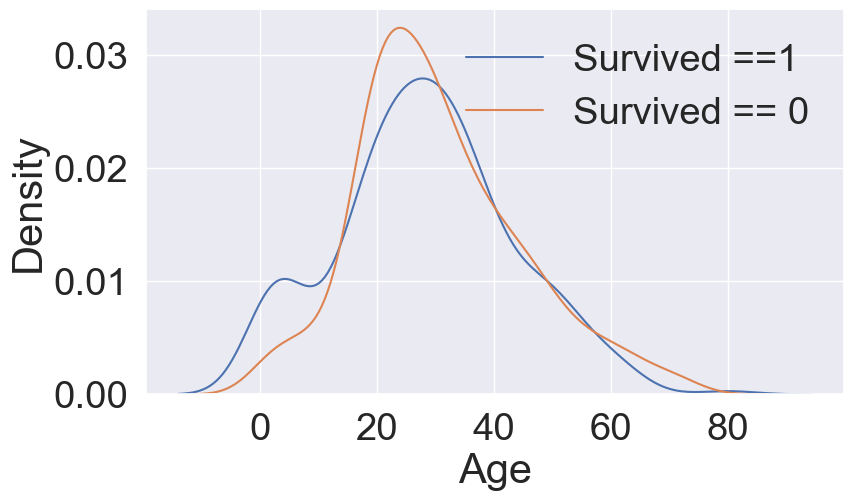

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(9,5))
sns.kdeplot(df_train[df_train['Survived'] == 1]['Age'], ax=ax)
sns.kdeplot(df_train[df_train['Survived'] == 0]['Age'], ax=ax)
plt.legend(['Survived ==1', 'Survived == 0'])
plt.show()

보시다시피, 생존자 중 나이가 어린 경우가 많음을 볼 수 있음

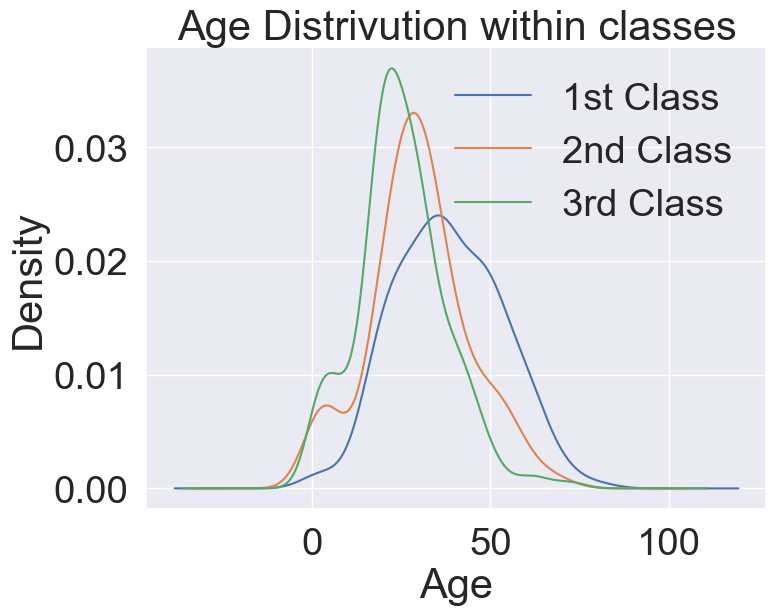

In [ ]:
# Age distribution withing classes
plt.figure(figsize=(8,6))
df_train['Age'][df_train['Pclass'] == 1].plot(kind='kde')
df_train['Age'][df_train['Pclass'] == 2].plot(kind='kde')
df_train['Age'][df_train['Pclass'] == 3].plot(kind='kde')

plt.xlabel('Age')
plt.title('Age Distrivution within classes')
plt.legend(['1st Class', '2nd Class', '3rd Class'])

    - Class가 높을 수록 나이 많은 사람의 비중이 커짐
    - 나이가 변하면서 생존률이 어떻게 되는지 보려고 한다.
    - 나이범위를 점점 넓혀가며, 생존률이 어떻게 되는지 확인

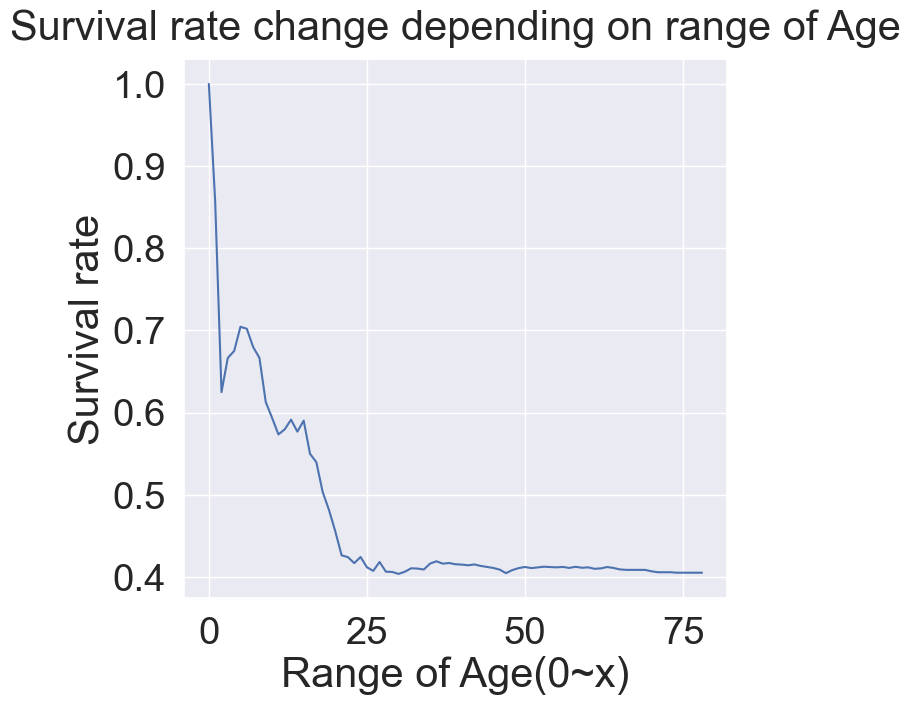

In [ ]:
cummulate_survival_ratio = []
for i in range(1, 80) : 
    cummulate_survival_ratio.append(df_train[df_train['Age'] < i]['Survived'].sum() / len(df_train[df_train['Age']<i]['Survived']))
    
plt.figure(figsize=(7,7))
plt.plot(cummulate_survival_ratio)
plt.title('Survival rate change depending on range of Age', y=1.02)
plt.ylabel('Survival rate')
plt.xlabel('Range of Age(0~x)')
plt.show()


    -보시다시피, 나이가 어릴수록 생존률이 확실히 높은것을 확인할 수 있음.
    -우리는 이 나이가 중요한 feature로 쓰일 수 있음을 확인함

2.5 Pclass, Sex, Age
    -지금까지 본, Sex, Pclass, Age, Survived 모두에 대해서 보고 싶습니다.
    이를 쉽게 그려주는 것이 seaborn이 violinplot입니다.
    - x 축은 우리가 나눠서 보고싶어하는 case(여기사 Pclass, Sex)를 나타내고, y축은 보고싶어하는 distribution(Age)입니다.

TypeError: violinplot() got multiple values for argument 'data'

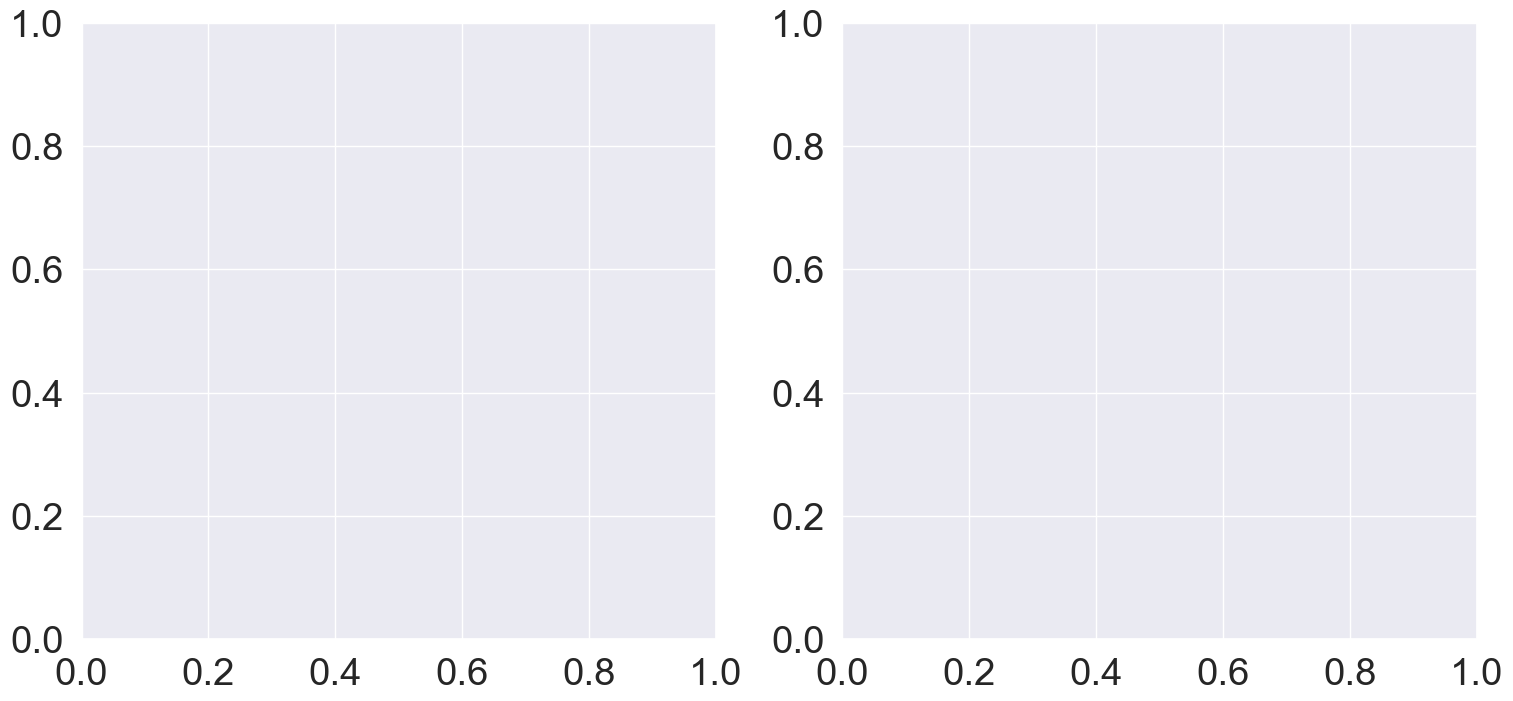

In [ ]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
sns.violinplot("Pclass", "age", hue="Survived", data=df_train, scale='count', split=True, ax=ax[0])
ax[0].set_tile('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot('Sex', 'Age', hue='Survived', data=df_train, scale='count', split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

    - 왼쪽 그림은 Pclass 별로 Age의 distribution이 어떻게 다른지, 거기에 생존여부에 다라 구분한 그래프이다.
    - 오른쪽 그림도 마찬가지 Sex, 생존에 따른 distribution이 어떻게 다른지 보여주는 그래프이다.
    - 생존만 봤을때, 모든 클래스에서 나이가 어릴수록 생존을 많이 한것을 볼 수 있다.
    - 오른쪽 그림에서 보면, 명확히 여자가 생존을 많이 한 것을 볼 수 있다.
    - 여성과 아이를 먼저 챙긴 것을 볼 수 있다.

2.6 Embarked
    - Embarked는 탑승한 항구를 나타냅니다.
    - 위에서 해왔던 것과 비슷하게 탑승하 곳에 따른 생존률을 보겠습니다.

<Axes: xlabel='Embarked'>

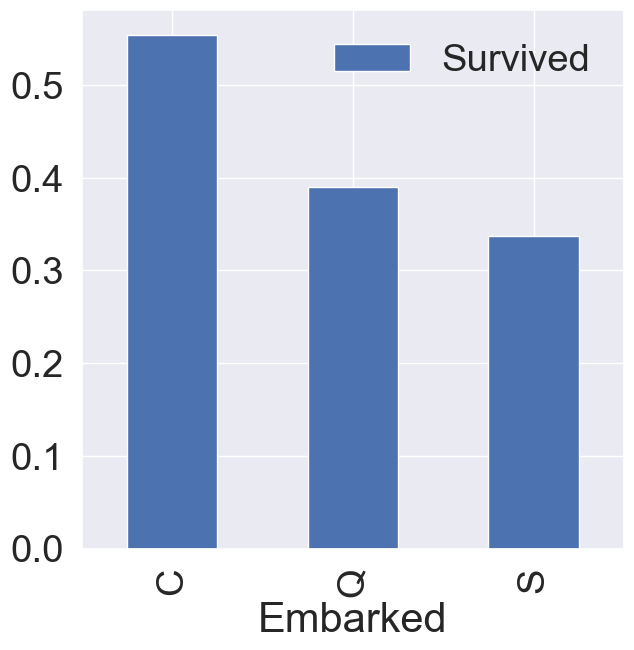

In [ ]:
f, ax = plt.subplots(1, 1, figsize=(7, 7))
df_train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax)

    - 보시다시피, 조금의 차이는 있지만 생존률은 좀 비슷한거 같습니다. 그래도 C가 제일 높군요
    - 모델에 얼마나 큰 영향을 미칠지는 모르겠지만, 그래도 사용하겠습니다.
    - 사실, 모델을 만들고 나면 우리가사용한 feature들이 얼마나 중요한 역할을 했는지 확인해볼 수 있습니다.
    이는 추후에 모델을 만들고 난 다음에 살펴볼 것입니다.
    - 다른 feature 로 split 하여 한번 살펴보겠습니다.

TypeError: countplot() got multiple values for argument 'data'

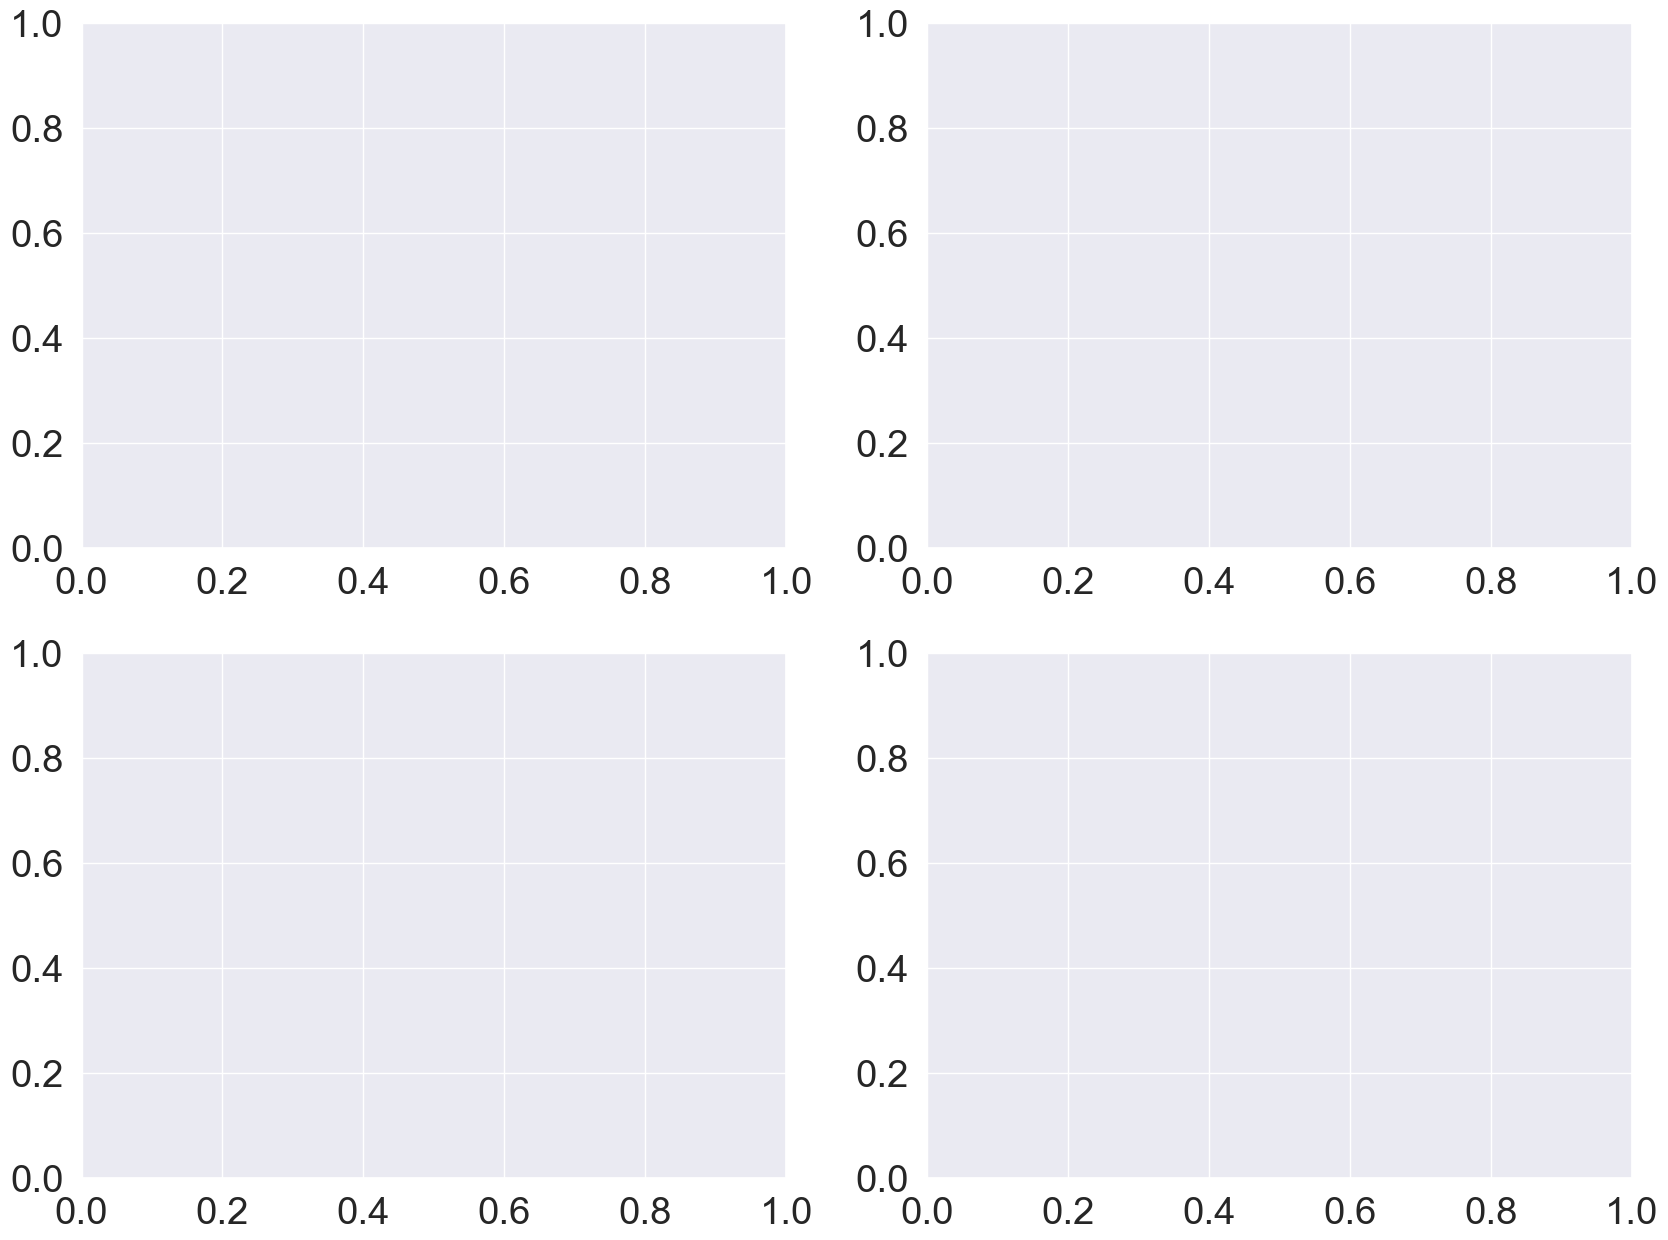

In [ ]:
f,ax=plt.subplots(2, 2, figsize=(20,15))

sns.countplot('Embarked', data=df_train, ax=ax[0,0])
ax[0,0].set_title('(1) No. Of Passengers Boarded')

sns.countplot('Embarked', hue='Sex', data=df_train, ax=ax[0,1])
ax[0,1].set_title('(2) Male-Female Split for Embarked')

sns.countplot('Embarked', hue='Survived', data=df_train, ax=ax[1,0])
ax[1,0].set_title('(3) Embarked vs Survived')

sns.countplot('Embarked', hue='Pclass', data=df_train, ax=ax[1,1])
ax[1,1].set_title('(4) Embarked vs Pclass')

plt.subplots_adjust(wspace=0.2, hspace=0.5)

plt.show()

    - Figure(1) - 전체적으로 봤을 때, S에서 가장 많은 사람이 탑승했습니다.
    - Figure(2) - C와 Q는 남녀의 비율이 비슷하고, S는 남자가 더 많습니다.
    - Figure(3) - 생존확률이 S 경우 많이 낮은 걸 볼 수 있습니다.
    - Figure(4) - Class로 slpit해서 보니, C가 생존확률이 높은건 클래스가 높은 사람이 많이 타서 그렇습니다.
    S는 3rd class가 많아서 생존확률이 낮게 나옵니다.

2.7 Family - SibSp(형제 자매) + Parch(부모, 자녀)

    -SibSp와 Parch를 합하면 Family가 될 것입니다.
    Family로 합쳐서 분석해봅시다.

In [ ]:
# 자신을 포함해야하니 1을 더합니다.
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1
df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch'] + 1

print('Maximum size of Family : ', df_train['FamilySize'].max())
print('Maximum size of Family : ', df_train['FamilySize'].min())

Maximum size of Family :  11
Maximum size of Family :  1


    - FamilySize와 생존의 관계를 한번 살펴봅시다.

TypeError: countplot() got multiple values for argument 'data'

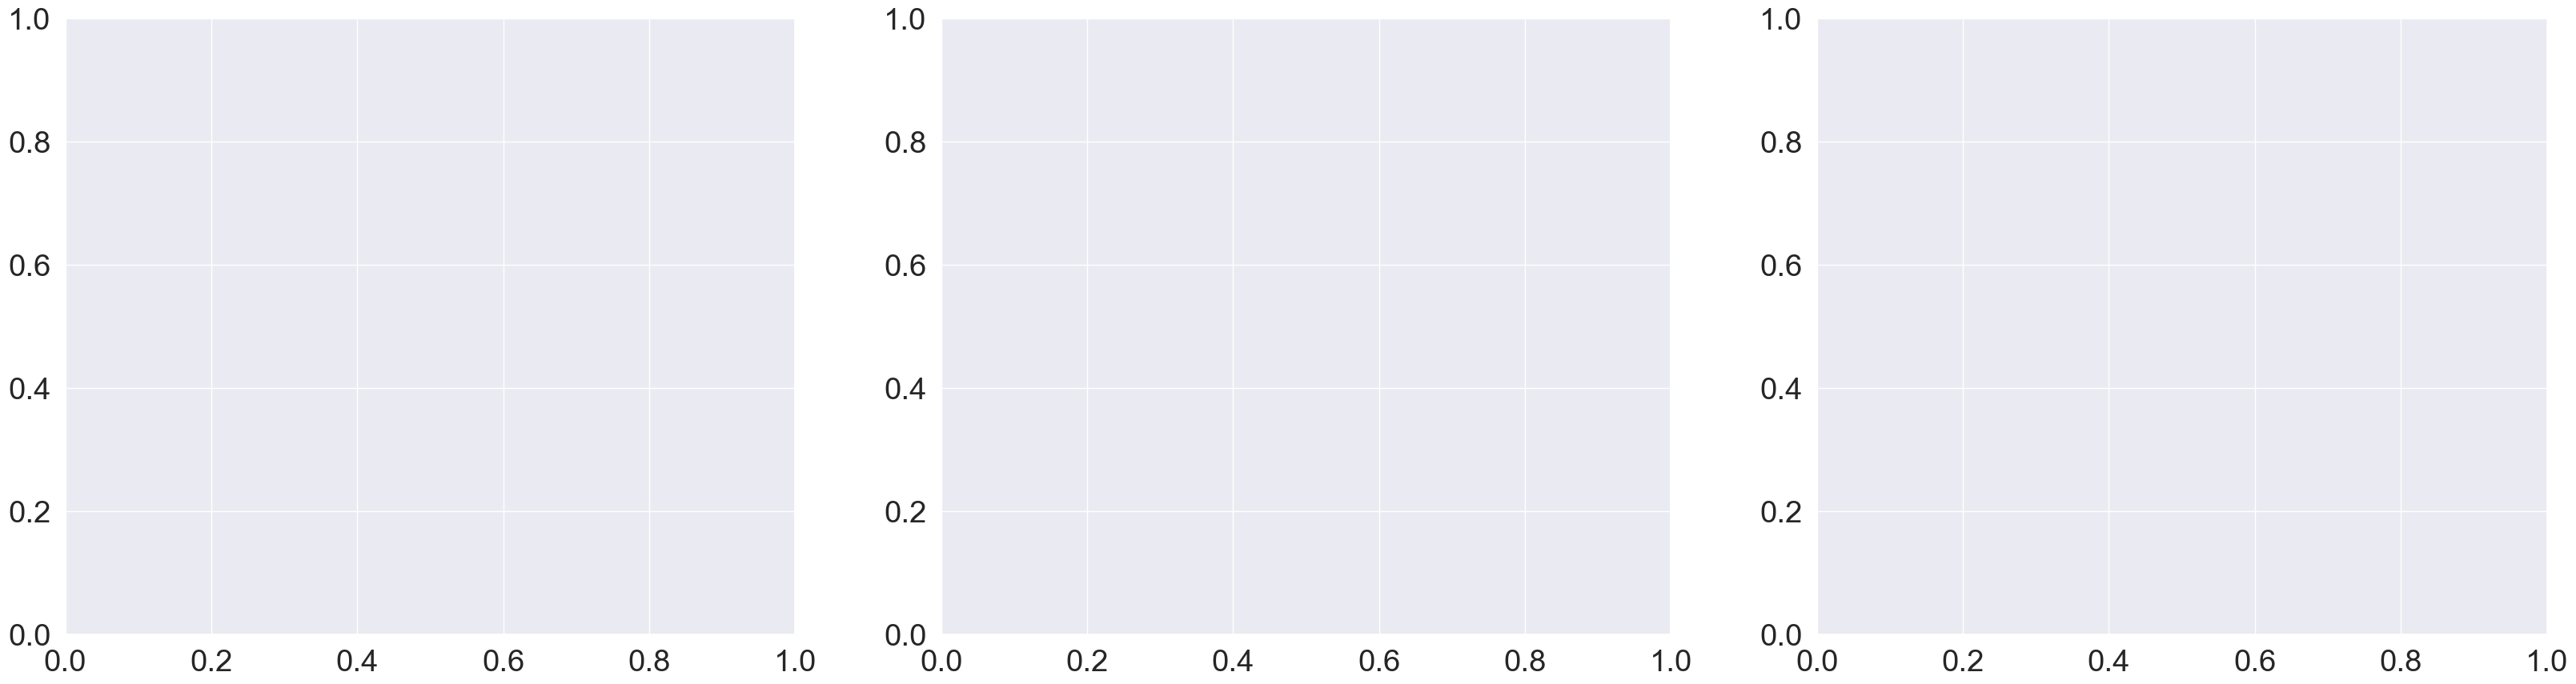

In [ ]:
f,ax=plt.subplots(1, 3, figsize=(40,10))
sns.countplot('FamilySize', data=df_train, ax=ax[0])
ax[0].set_title('(1) No. Of Passengers Boarded', y=1.02)

sns.countplot('FamilySize', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('(2) Survived countplot depending on FamilySize',  y=1.02)

df_train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax[2])
ax[2].set_title('(3) Survived rate depending on FamilySize',  y=1.02)

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

    - Figure(1) - 가족크기가 1~11까지 있음을 볼 수 있다.
    대부분 1명이고, 그 다음으로 2,3,4 명이다.
    - Figure(2),(3) - 가족 크기에 따른 생존비교이다.
    가족이 4명인 경우가 가장 생존확률이 높다. 가족수가 많아질수록 (5,6,8,11)생존 확률이 낮아진다.
    가족수가 너무 작아도91), 너무 커도(5,6,7,11) 생존확률이 낮아진다.
    3~4명 선에서 생존확률이 가장 높은 걸 확인할 수 있다.

2.8 Fare

    - Fare는 탑승요금이며 contious feature이다.
    한반 history를 확인해보자

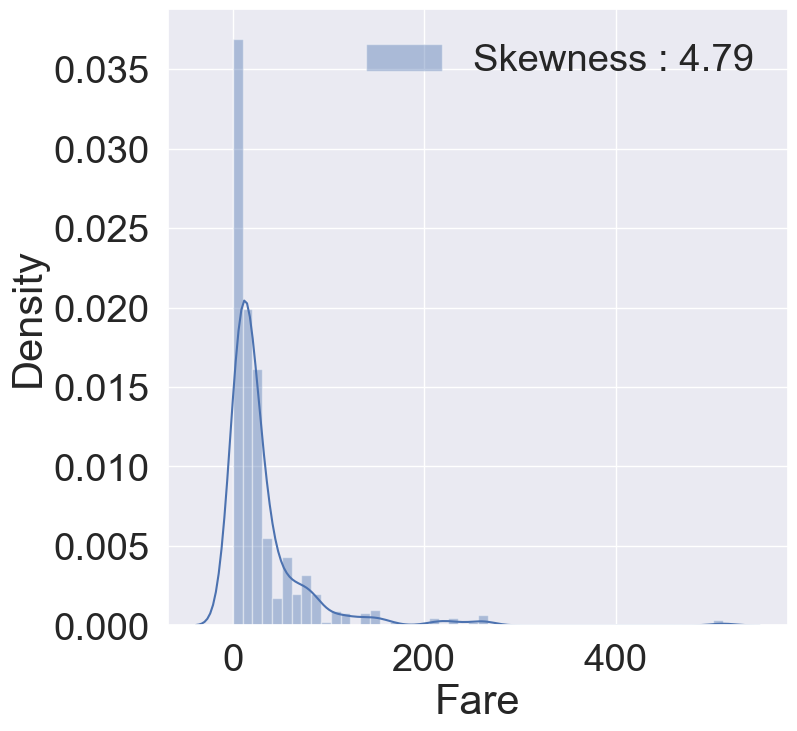

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
g = sns.distplot(df_train['Fare'], color='b', label='Skewness : {:.2f}'.format(df_train['Fare'].skew()), ax=ax)
g = g.legend(loc='best')

    - 보시다시피, distribution이 매우 비대칭인 것을 알 수 있습니다. (hight skewness)
    만약 이대로 모델에 넣어준다면 자칫 모델이 잘못 학습할 수도 있습니다.
    몇개 없는 outlier에 대해서 너무 민감하게 반응한다면, 실제 예측 시에 좋지 못한 결과를 부를 수 잇습니다.
    
    - outlier의 영향을 줄이기 위해 Fare에 log를 취하겠습니다.
    
    - 여기서 우리는 pandas의 유용한 기능을 사용할 것입니다.
    dataFrame의 특정 columms에 공통된 작업(함수)를 적용하고 싶으면 아래의 map 또는 apply를 사용하면 매우 손쉽게 적용할 수 있습니다.
    
    - 우리가 지금 원하는 것은 Fare columns의 데이터 모두를 log값 취하는 것인데, 파이썬의 간단한 lamdba 함수를 이용해 간단한 로그를 적용하는 함수를 map에 인수로 넣어주면, 
    Fare columns 데이터에 그대로 적용이 됩니다.
    매우 유용한 기능이니 꼭 숙지하세요

In [ ]:
df_test.loc[df_test.Fare.isnull(), 'fare'] = df_test['Fare'].mean()     # testset에 있는 NaN value를 평균값으로 치환합니다.
df_train['Fare'] = df_train['Fare'].map(lambda i : np.log (i) if i > 0 else 0)
df_test['Fare'] = df_test['Fare'].map(lambda i : np.log(i) if i > 0 else 0) 

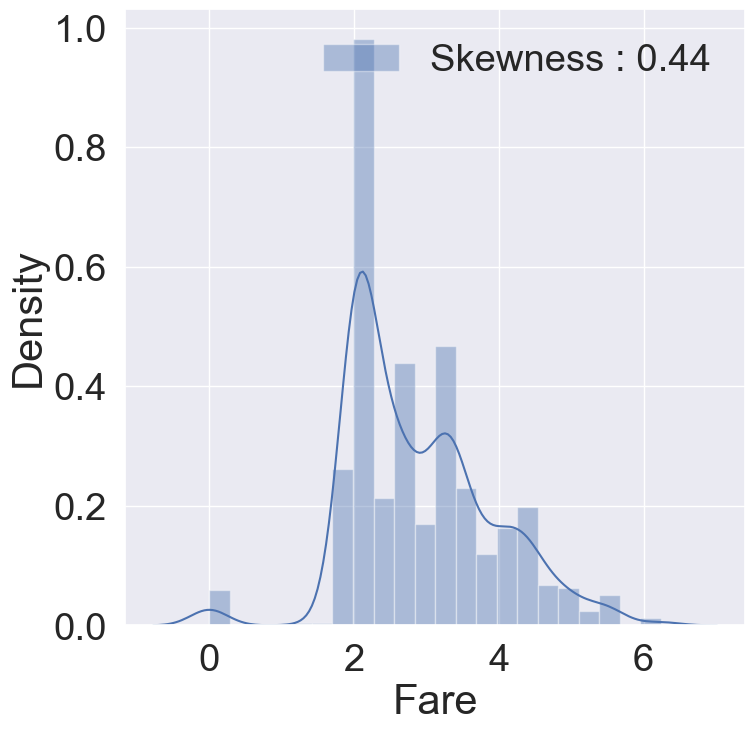

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
g = sns.distplot(df_train['Fare'], color='b', label='Skewness : {:.2f}'.format(df_train['Fare'].skew()), ax=ax)
g = g.legend(loc='best')

    - log를 취하니, 이제 비대칭성이 많이 사라진 것을 볼 수 있다.
    - 우리는 이런 작업을 사용해 모델이 좀 더 좋은 성능을 내도록 할 수 있다.
    - 사실, 방금한 것은 feature engineering에 들어가는 부분인데, 여기서 작업했습니다.
    - 모델을 학습시키기 위해, 그리고 그 모델의 성능을 높이기 위해 feature들에 여러 조작을 가하거나,
    새로운 feature를 추가하는 것을 feature engineering 이라고 하는데, 우리는 이제 그것을 살펴 볼 것이다.

2.9 Cabin

    - 이 fearure는 NaN이 대략 80%이므로, 생존에 영향을 미칠 중요한 정보를 얻어내기가 쉽지 않다.
    그러므로 우리가 세우려는 모델에 포함시키지 않도록 하겠습니다.

In [ ]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Familysize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,1.981001,NaN,S,2,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.266662,C85,C,2,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.070022,NaN,S,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.972177,C123,S,2,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.085672,NaN,S,1,1


2.10 Ticket

    - 이 feature는 NaN는 없습니다.
    일단 string data이므로 우리가 어던 작업들을 해주어야 실제 모델에 사용할 수 있는데, 이를 위해선 사실 아이디어가 필요합니다.

In [ ]:
df_train['Ticket'].value_counts()

Ticket
347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: count, Length: 681, dtype: int64

    - 보시다시피 ticket number는 매우 다양합니다
    우리는 여기서 어떤 특징을 이끌어내서 생존과 연결 시킬 수 있을까요?
    
    - 여러분이 직접 한번 아이디어를 내보세요!
    이것이 본격적인 캐글 레이스의 시작점입니다.
    
    - 이 튜토리얼에서는 튜토리얼이니 일단 ticket은 넘기도록 하겠습니다.
    튜토리얼을 끝낸 후, 여러분의 모델의 성능을 향상시키기 위해 ticket에서 정보를 이끌어내는 것도 좋겠네요.